Dataset 1

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Flatten # Import Flatten
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preprocessing function to map emoticons to integer values
def preprocess_emoticons(train_path, test_path):
    """
    Preprocess the input emoticons in the dataset by creating a unique integer mapping
    for each distinct emoticon. This function returns preprocessed train and test datasets
    along with the emoticon-to-integer mapping.

    Args:
    train_path (str): Path to the training dataset CSV file.
    test_path (str): Path to the test dataset CSV file.

    Returns:
    train_input (pd.DataFrame): Preprocessed training dataset with mapped integers.
    test_data (pd.DataFrame): Preprocessed test dataset with mapped integers.
    emoticon_to_int (dict): Mapping from emoticons to unique integers.
    """
    # Load train and test datasets
    train_input = pd.read_csv(train_path)  # Assuming 'input_emoticon' and 'labels' columns
    test_data = pd.read_csv(test_path)  # Assuming test_data has similar structure

    # Step 1: Extract all unique emoticons from the training dataset
    all_emoticons = ''.join(train_input['input_emoticon'].values)
    unique_emoticons = sorted(set(all_emoticons))  # Sort for consistent mapping
    print(len(unique_emoticons))

    # Step 2: Create the emoticon to integer mapping
    emoticon_to_int = {emoticon: i for i, emoticon in enumerate(unique_emoticons)}

    # Step 3: Preprocessing function to map emoticons to their corresponding integer values
    def map_emoticons_to_int(emoticon_string):
        return [emoticon_to_int[emoticon] for emoticon in emoticon_string]

    # Apply the mapping to train and test datasets
    train_input['mapped_input'] = train_input['input_emoticon'].apply(map_emoticons_to_int)
    test_data['mapped_input'] = test_data['input_emoticon'].apply(map_emoticons_to_int)

    return train_input, test_data, emoticon_to_int

# Load and preprocess datasets
train_path = "/content/train_emoticon.csv"
test_path = "/content/valid_emoticon.csv"
train_input, test_data, emoticon_to_int = preprocess_emoticons(train_path, test_path)

# Extract features and labels
X_train_raw = train_input['mapped_input'].tolist()
y_train = train_input['label'].values
X_test_raw = test_data['mapped_input'].tolist()
y_test = test_data['label'].values

# Step 1: Pad sequences to ensure all have the same length (13 in this case)
max_length = 13  # Since each emoticon string is of length 13
X_train = pad_sequences(X_train_raw, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test_raw, maxlen=max_length, padding='post', truncating='post')

# Step 2: Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

vocab_size = len(emoticon_to_int)  # Number of unique emoticons
embedding_dim = 10
num_filters = 8
kernel_size = 3
sequence_length = max_length  # Length of each input sequence

# Build the CNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
    Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
    Flatten(),
    # Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the CNN model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=16)

# Step 5: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Print validation accuracy per epoch
for epoch, val_acc in enumerate(history.history['val_accuracy']):
    print(f"Epoch {epoch + 1}: Validation Accuracy = {val_acc}")
print(model.summary())

214
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5415 - loss: 0.6842 - val_accuracy: 0.8672 - val_loss: 0.3377
Epoch 2/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8793 - loss: 0.2942 - val_accuracy: 0.9244 - val_loss: 0.1946
Epoch 3/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9300 - loss: 0.1861 - val_accuracy: 0.9379 - val_loss: 0.1583
Epoch 4/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9553 - loss: 0.1296 - val_accuracy: 0.9477 - val_loss: 0.1333
Epoch 5/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.1051 - val_accuracy: 0.9548 - val_loss: 0.1198
Epoch 6/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9752 - loss: 0.0816 - val_accuracy: 0.9541 - val_loss: 0.1077
Epoch 7/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9806 - loss: 0.0693 - val_accuracy: 0.9626 - val_loss: 0.1045
Epoch 8/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9820 - loss: 0.0570 - val_accuracy: 0.9548 - val_

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (16, 13, 10)                │           2,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (16, 11, 8)                 │             248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (16, 9, 8)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (16, 72)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (16, 1)                     │              73 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,985 (31.20 KB)

 Trainable params: 2,661 (10.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,324 (20.80 KB)

None


Dataset 2

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

# read feature dataset
train_feat = np.load("/content/train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']

# test_feat_X = np.load("/content/test_feature.npz", allow_pickle=True)['features']

# Set the number of components to reduce the features to (e.g., 100)
n_components = 50

# Apply PCA to reduce the number of features from 768 to 100
pca = PCA(n_components=n_components)

# Reshape X to 2D (flatten the 13x768 feature matrix for PCA)
n_samples, n_time_steps, n_features = train_feat_X.shape  # train_feat_X has shape (n_samples, 13, 768)
X_flattened = train_feat_X.reshape(n_samples * n_time_steps, n_features)

# Apply PCA on the flattened data
X_reduced_flat = pca.fit_transform(X_flattened)

# Reshape back to 3D (with reduced features)
X_reduced = X_reduced_flat.reshape(n_samples, n_time_steps, n_components)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_reduced, train_feat_Y, test_size=0.3, random_state=42)

# Define the CNN model
model = models.Sequential()

# Adjust the input shape to reflect the reduced number of components
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(13, n_components), padding='same'))

# Add second Convolutional layer with padding='same' to prevent dimension reduction
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'))

# Add a Global Max Pooling layer to aggregate features over time steps without aggressive downsampling
model.add(layers.GlobalMaxPooling1D())

# Flatten the results for the Dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

valid_feat = np.load("/content/valid_feature.npz", allow_pickle=True)
valid_feat_X = valid_feat['features']
valid_feat_Y = valid_feat['label']


import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load the saved model (update with your saved model's path)
# model = load_model('feat_model_1.h5')

# Set the number of components used for PCA (should match what was used during training)
n_components = 50

# Apply PCA to reduce the validation set features from 768 to 50
pca = PCA(n_components=n_components)

# Flatten the validation data from 3D (n_samples, 13, 768) to 2D (n_samples * 13, 768)
n_samples, n_time_steps, n_features = valid_feat_X.shape  # Shape: (None, 13, 768)
valid_feat_X_flat = valid_feat_X.reshape(n_samples * n_time_steps, n_features)

# Apply PCA transformation (you need to have trained PCA on the training data earlier and re-use it here)
valid_feat_X_reduced_flat = pca.fit_transform(valid_feat_X_flat)  # Use the same PCA that was fit on training data

# Reshape back to 3D (n_samples, 13, n_components)
valid_feat_X_reduced = valid_feat_X_reduced_flat.reshape(n_samples, n_time_steps, n_components)

# Get predictions for the validation set
y_pred_val = (model.predict(valid_feat_X_reduced) > 0.5).astype("int32")

# If you have the true labels, calculate accuracy
if 'label' in valid_feat.files:
    valid_feat_Y = valid_feat['label']
    print(f"Validation Accuracy: {accuracy_score(valid_feat_Y, y_pred_val):.4f}")

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7377 - loss: 0.5965 - val_accuracy: 0.9506 - val_loss: 0.1534
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9664 - loss: 0.1285 - val_accuracy: 0.9623 - val_loss: 0.0871
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9708 - loss: 0.0797 - val_accuracy: 0.9614 - val_loss: 0.0764
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9730 - loss: 0.0651 - val_accuracy: 0.9623 - val_loss: 0.0704
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9769 - loss: 0.0575 - val_accuracy: 0.9637 - val_loss: 0.0689
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9763 - loss: 0.0553 - val_accuracy: 0.9713 - val_loss: 0.0609
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9793 - loss: 0.0504 - val_accuracy: 0.9746 - val_loss: 0.0545
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9810 - loss: 0.0458 - val_accuracy: 0

dataset 3

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5018 - loss: 0.6933 - val_accuracy: 0.5353 - val_loss: 0.6926
Epoch 2/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5365 - loss: 0.6914 - val_accuracy: 0.5410 - val_loss: 0.6907
Epoch 3/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5683 - loss: 0.6839 - val_accuracy: 0.6081 - val_loss: 0.6685
Epoch 4/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6019 - loss: 0.6572 - val_accuracy: 0.6653 - val_loss: 0.6235
Epoch 5/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6513 - loss: 0.6179 - val_accuracy: 0.7274 - val_loss: 0.5660
Epoch 6/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7137 - loss: 0.5610 - val_accuracy: 0.7669 - val_loss: 0.4921
Epoch 7/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7602 - loss: 0.5018 - val_accuracy: 0.7952 - val_loss: 0.4594
Epoch 8/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7794 - loss: 0.4620 - val_accuracy: 0.8206 - v

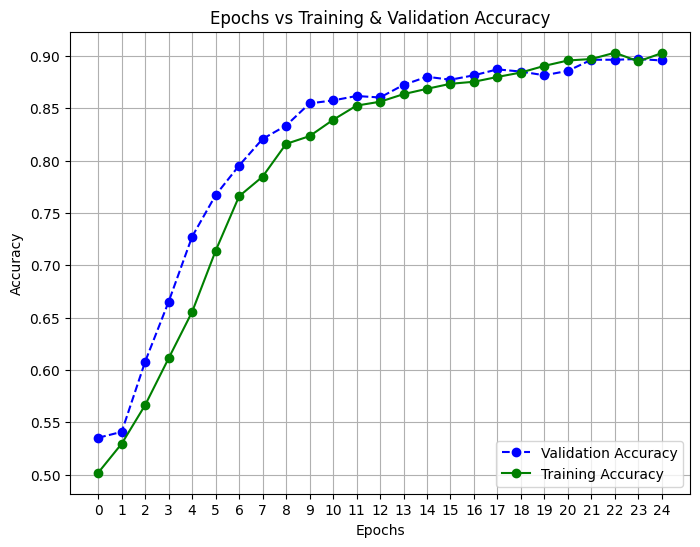

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Classical CNN Test Accuracy: 0.9366


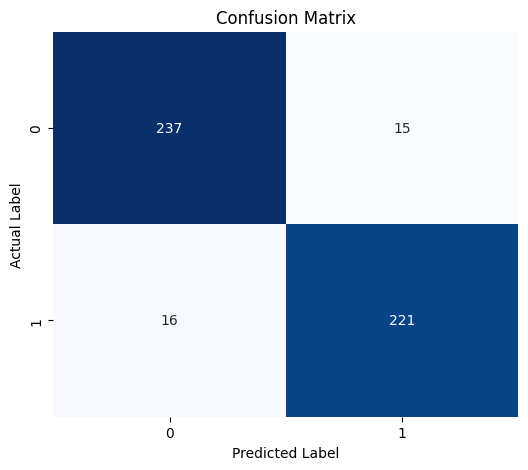

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       252
           1       0.94      0.93      0.93       237

    accuracy                           0.94       489
   macro avg       0.94      0.94      0.94       489
weighted avg       0.94      0.94      0.94       489



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (16, 50, 50)                │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (16, 48, 32)                │           4,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (16, 46, 16)                │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (16, 44, 8)                 │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (16, 42, 8)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (16, 42, 8)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (16, 336)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (16, 1)                     │             337 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,591 (92.16 KB)

 Trainable params: 7,863 (30.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,728 (61.44 KB)

None


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, AveragePooling1D
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
# Hyperparameters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import random

train_input = "/content/train_text_seq.csv"
test_input = "/content/valid_text_seq.csv"

def set_seed(seed_value=42):
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)
    # tf.keras.utils.set_random_seed(seed_value)

set_seed(42)

# Function to preprocess data (character-level tokenization)
def preprocess_data(strings, max_length):
    tokenizer = Tokenizer(char_level=True)  # Tokenizer will work on characters
    tokenizer.fit_on_texts(strings)
    sequences = tokenizer.texts_to_sequences(strings)
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    vocab_size = len(tokenizer.word_index) + 1  # size of the character vocabulary
    return padded_sequences, vocab_size

MAX_LENGTH = 50  # Fixed length of each string
TEST_SIZE = 0.2
# Load training and test data
train_data = pd.read_csv(train_input)  # Assuming CSV with columns ['text', 'label']
test_data = pd.read_csv(test_input)

# Preprocess training data and split into training and validation sets
X_train_full, vocab_size_train = preprocess_data(train_data['input_str'].values, MAX_LENGTH)

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, train_data['label'].values, test_size=TEST_SIZE, random_state=42)

# Preprocess test data
X_test, vocab_size_test = preprocess_data(test_data['input_str'].values, MAX_LENGTH)

# Use the vocabulary size from the training set
vocab_size = vocab_size_train

# Get the binary labels for test data
y_test = test_data['label'].values



MAX_LENGTH = 50  # Fixed length of each string
TEST_SIZE = 0.2  # Proportion of data for validation split


embedding_dim = 50
num_filters_1 = 32
num_filters_2 = 16
num_filters_3 = 8
num_filters_4 = 8
kernel_size = 3
sequence_length = 50
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    Conv1D(filters=num_filters_1, kernel_size=kernel_size, activation='relu'),
    Conv1D(filters=num_filters_2, kernel_size=kernel_size, activation='relu'),
    Conv1D(filters=num_filters_3, kernel_size=kernel_size, activation='relu'),
    Conv1D(filters=num_filters_4, kernel_size=kernel_size, activation='relu'),
    Dropout(0.5),
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification
])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping callback to stop training when the validation accuracy stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor
    patience=3,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights from the epoch with the best validation loss
)

# Train the CNN model and store the history
history = cnn_model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_val, y_val))

# Plotting Epochs vs Validation Accuracy
plt.figure(figsize=(8, 6))

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='--', color='b')
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', color='g')
plt.title('Epochs vs Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 25, step=1))  # Set x-ticks for each epoch
plt.grid(True)
plt.legend(loc='lower right')  # Legend for the plot
plt.show()

# Evaluate classical CNN accuracy on the test data
y_pred_prob = cnn_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Print test accuracy
_, cnn_test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Classical CNN Test Accuracy: {cnn_test_acc:.4f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Model Summary
print(cnn_model.summary())

Task 2

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings from solvers that don't support certain penalties

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

class DataPreprocessor:
    def __init__(self, emoticons_path, deep_features_path, text_sequence_path):
        self.emoticons_path = emoticons_path
        self.deep_features_path = deep_features_path
        self.text_sequence_path = text_sequence_path
        self.label_encoder = LabelEncoder()
        self.vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2), max_features=1000)

    def load_emoticons_data(self):
        emoticons_df = pd.read_csv(self.emoticons_path)
        encoded_emoticons = emoticons_df['input_emoticon'].apply(lambda x: list(self.label_encoder.fit_transform(list(x))))
        X_emoticons = pd.DataFrame(encoded_emoticons.tolist())
        y_emoticons = emoticons_df['label']
        return X_emoticons, y_emoticons

    def load_deep_features_data(self):
        deep_features = np.load(self.deep_features_path)
        X_deep = deep_features['features']
        X_deep_flattened = X_deep.reshape(X_deep.shape[0], -1)  # Flatten the 13x786 to 1x10218
        y_deep = deep_features['label']
        return X_deep_flattened, y_deep

    def load_text_sequence_data(self):
        text_sequence_df = pd.read_csv(self.text_sequence_path)
        X_text = self.vectorizer.fit_transform(text_sequence_df['input_str']).toarray()
        y_text = text_sequence_df['label']
        return X_text, y_text

    def combine_features(self, X_emoticons, X_deep_flattened, X_text):
        return np.concatenate([X_emoticons, X_deep_flattened, X_text], axis=1)

    def process(self):
        X_emoticons, y_emoticons = self.load_emoticons_data()
        X_deep_flattened, y_deep = self.load_deep_features_data()
        X_text, y_text = self.load_text_sequence_data()

        # Combine all features
        X_combined = self.combine_features(X_emoticons, X_deep_flattened, X_text)
        y_combined = y_emoticons  # Use emoticon labels or any consistent label
        return X_combined, y_combined

# Initialize the preprocessor
preprocessor = DataPreprocessor(
    emoticons_path='/content/train_emoticon.csv',
    deep_features_path='/content/train_feature.npz',
    text_sequence_path='/content/train_text_seq.csv'
)

# Process datasets
X_combined_train, y_combined_train = preprocessor.process()

preprocessor_2 = DataPreprocessor(
    emoticons_path='/content/valid_emoticon.csv',
    deep_features_path='/content/valid_feature.npz',
    text_sequence_path='/content/valid_text_seq.csv'
)

# Process datasets
X_combined_test, y_combined_test = preprocessor_2.process()
# Split into train and test sets

# List of PCA components to iterate over
n_components = 1000

# Scaler
scaler = StandardScaler()
X_train_subset, y_train_subset = X_combined_train, y_combined_train

# Scale the data
X_train_subset = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_combined_test)

# Apply PCA on the training subset
pca = PCA(n_components=n_components)
X_train_subset_pca = pca.fit_transform(X_train_subset)
print(f"Training shape after PCA: {X_train_subset_pca.shape}")

X_test_pca = pca.transform(X_test_scaled)
print(f"Test shape after PCA: {X_test_pca.shape}")

# Set up the Logistic Regression model with GridSearchCV
logistic_model = LogisticRegression(max_iter=1000, C = 1, penalty='l1', solver = 'liblinear')

# Fit the model to the training data
logistic_model.fit(X_train_subset_pca, y_train_subset) # This line is added

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_combined_test, y_pred)
report = classification_report(y_combined_test, y_pred)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")
print(f"Classification Report:\n{report}")


Training shape after PCA: (7080, 1000)
Test shape after PCA: (489, 1000)
Test Set Accuracy: 98.98%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       252
           1       0.99      0.99      0.99       237

    accuracy                           0.99       489
   macro avg       0.99      0.99      0.99       489
weighted avg       0.99      0.99      0.99       489

